In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

In [6]:
n=300
data = {
    'student_id':np.arange(1,n+1),
    'course_name':np.random.choice(['Python','Java','Cloud'],n),
    'progress_percent':np.random.randint(30,98,n),
    'completion_days':np.random.randint(20,60,n),
    'rating':np.random.uniform(1,10,n)
}

In [7]:
df = pd.DataFrame(data)
df.head()

,student_id,course_name,progress_percent,completion_days,rating
0,1,Cloud,64,20,9.396443
1,2,Python,90,22,9.918365
2,3,Cloud,70,35,2.845016
3,4,Cloud,62,42,4.413057
4,5,Python,97,30,9.338045


In [8]:
poor_completion = (
    df.groupby("course_name")["progress_percent"]
      .mean()
      .loc[lambda x: x < 80]
)

poor_completion.head()


course_name
Cloud     65.252336
Java      63.776596
Python    63.070707
Name: progress_percent, dtype: float64

In [9]:
avg_completion_time = (
    df.groupby("course_name")["completion_days"]
      .mean()
)

avg_completion_time


course_name
Cloud     37.168224
Java      40.138298
Python    38.929293
Name: completion_days, dtype: float64

In [10]:
completion_stats = {
    "mean_days": np.mean(df["completion_days"]),
    "median_days": np.median(df["completion_days"]),
    "std_dev": np.std(df["completion_days"]),
    "min_days": np.min(df["completion_days"]),
    "max_days": np.max(df["completion_days"])
}

completion_stats


{'mean_days': np.float64(38.68),
 'median_days': np.float64(39.0),
 'std_dev': np.float64(11.661515053085227),
 'min_days': np.int32(20),
 'max_days': np.int32(59)}

In [11]:
df["improved_progress"] = np.clip(
    df["progress_percent"] * 1.10,
    0,
    100
)

df[["progress_percent", "improved_progress"]].head()


,progress_percent,improved_progress
0,64,70.4
1,90,99.0
2,70,77.0
3,62,68.2
4,97,100.0


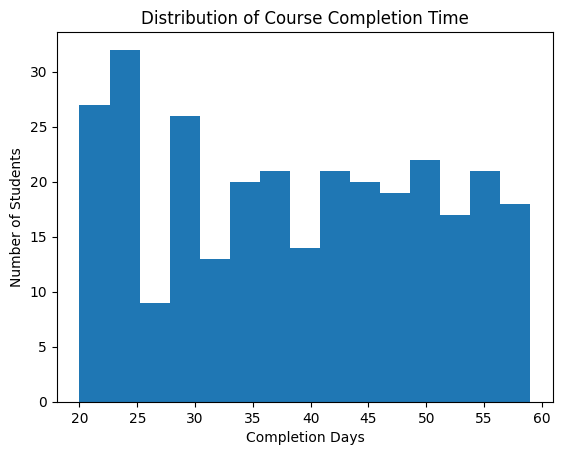

In [12]:
plt.hist(df["completion_days"], bins=15)
plt.xlabel("Completion Days")
plt.ylabel("Number of Students")
plt.title("Distribution of Course Completion Time")
plt.show()


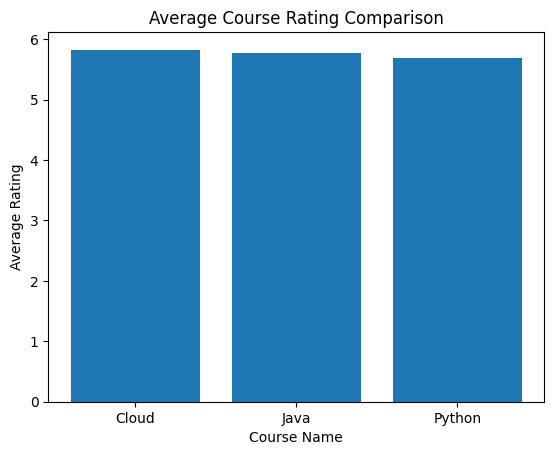

In [ ]:
avg_ratings = df.groupby("course_name")["rating"].mean()

plt.bar(avg_ratings.index, avg_ratings.values)
plt.xlabel("Course Name")
plt.ylabel("Average Rating")
plt.title("Average Course Rating Comparison")
plt.show()
